In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
# Assign the demographics class to a variable called `Demographics`
Measurement = Base.classes.measurement
# Assign the demographics class to a variable called `Demographics`
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Data familiarization
Measurement.__table__.columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [10]:
# Data familiarization for Measurement
for row in session.query(Measurement.id, Measurement.station, Measurement.date,\
                         Measurement.prcp, Measurement.tobs).limit(5).all():
    print(row)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)


In [11]:
# Data familiarization
Station.__table__.columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [12]:
# Data familiarization for Station
for row in session.query(Station.id, Station.station, Station.name, Station.latitude,\
                         Station.longitude, Station.elevation).limit(5).all():
    print(row)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)


In [23]:
station_list = session.query(Station.name, Station.id, Station.station, Station.latitude,
                         Station.longitude, Station.elevation).all()
print(station_list)

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9), (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]


In [13]:
# Find the most recent date in the data set.
date_max = session.query(func.max(Measurement.date)).all()
print(f"Maximum date: {date_max[0][0]}")

Maximum date: 2017-08-23


In [14]:
#current_time = dt.dt.utcnow()
one_year_ago = dt.date(2017,8,23)- dt.timedelta(weeks=52)
print(one_year_ago)

2016-08-24


In [15]:
date_max[0][0]

'2017-08-23'

In [16]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [17]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [18]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:
session.query(Measurement.station, Station.station).limit(10).all()

<ipython-input-19-8b8a6df4d141>:1: SAWarning: SELECT statement has a cartesian product between FROM element(s) "measurement" and FROM element "station".  Apply join condition(s) between each element to resolve.
  session.query(Measurement.station, Station.station).limit(10).all()


[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397')]

In [20]:
same_data = session.query(Measurement, Station).filter(Measurement.station == Station.station).limit(10).all()


for record in same_data:
    (measurement, station) = record
    print(measurement.station)
    print(station.station)

USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397


In [21]:

# This JOINs the data in the two tables together into a single dataset (here in the form of a tuple).
# Note: We are going to limit the results to 10 for printing
sel = [Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs,\
       Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
data_joined = session.query(*sel).filter(Measurement.station == Station.station).filter(Measurement.date>='2016-08-23').limit(10).all()
print(data_joined[0])

(2364, 'USC00519397', '2016-08-23', 0.0, 81.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)


In [22]:
for row in data_joined:
    print(data_joined[0])

(2364, 'USC00519397', '2016-08-23', 0.0, 81.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2364, 'USC00519397', '2016-08-23', 0.0, 81.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2364, 'USC00519397', '2016-08-23', 0.0, 81.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2364, 'USC00519397', '2016-08-23', 0.0, 81.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2364, 'USC00519397', '2016-08-23', 0.0, 81.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2364, 'USC00519397', '2016-08-23', 0.0, 81.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2364, 'USC00519397', '2016-08-23', 0.0, 81.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2364, 'USC00519397', '2016-08-23', 0.0, 81.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2364, 'USC00519397', '2016-08-23', 0.0, 81.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US',

In [22]:
df1 = pd.read_sql(sql = session.query(Measurement)\
                         .with_entities(Measurement.id, Measurement.station, Measurement.date,\
                         Measurement.prcp, Measurement.tobs).filter(Measurement.date>='2016-08-23').statement, 
                 con = session.bind)
df1.head()

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0


In [23]:
df2 = pd.read_sql(sql = session.query(Station)\
                         .with_entities(Station.id, Station.station, Station.name, Station.latitude,\
                         Station.longitude, Station.elevation).statement, 
                 con = session.bind)
df2.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [95]:
last_year_meas = session.query(Measurement.id, Measurement.station, Measurement.date,\
                         Measurement.prcp, Measurement.tobs).filter(Measurement.date>='2016-08-23').all()
print(last_year_meas)


last_year_station = session.query(Station.id, Station.station, Station.name, Station.latitude,\
                         Station.longitude, Station.elevation).all()
# print(last_year_station)


[(2364, 'USC00519397', '2016-08-23', 0.0, 81.0), (2365, 'USC00519397', '2016-08-24', 0.08, 79.0), (2366, 'USC00519397', '2016-08-25', 0.08, 80.0), (2367, 'USC00519397', '2016-08-26', 0.0, 79.0), (2368, 'USC00519397', '2016-08-27', 0.0, 77.0), (2369, 'USC00519397', '2016-08-28', 0.01, 78.0), (2370, 'USC00519397', '2016-08-29', 0.0, 78.0), (2371, 'USC00519397', '2016-08-30', 0.0, 79.0), (2372, 'USC00519397', '2016-08-31', 0.13, 80.0), (2373, 'USC00519397', '2016-09-01', 0.0, 81.0), (2374, 'USC00519397', '2016-09-02', 0.0, 80.0), (2375, 'USC00519397', '2016-09-03', 0.0, 79.0), (2376, 'USC00519397', '2016-09-04', 0.03, 75.0), (2377, 'USC00519397', '2016-09-05', None, 79.0), (2378, 'USC00519397', '2016-09-06', None, 76.0), (2379, 'USC00519397', '2016-09-07', 0.05, 76.0), (2380, 'USC00519397', '2016-09-08', 0.0, 80.0), (2381, 'USC00519397', '2016-09-09', 0.03, 79.0), (2382, 'USC00519397', '2016-09-10', 0.0, 78.0), (2383, 'USC00519397', '2016-09-11', 0.05, 76.0), (2384, 'USC00519397', '2016-0

In [25]:
merge_df = pd.merge(df1, df2, on='station', how='left')
plot_df = merge_df[['date','prcp']]
plot_df = plot_df.set_index('date')
plot_df = plot_df.sort_values('date')
plot_df = plot_df.dropna()
plot_df.columns

Index(['prcp'], dtype='object')

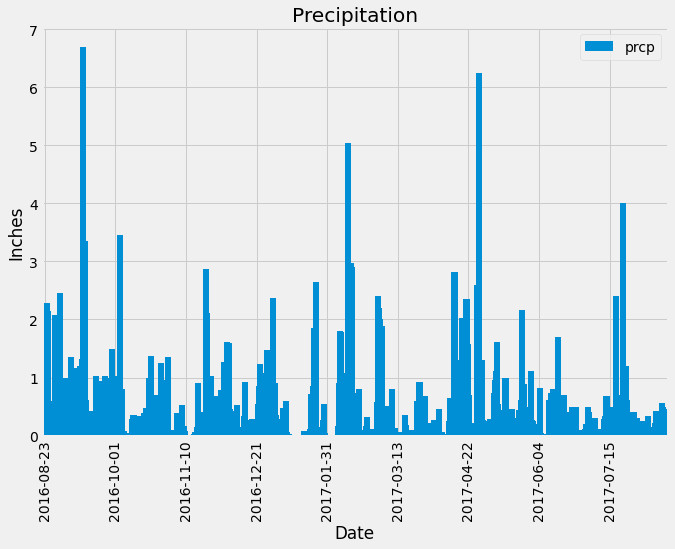

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores




# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tick_spacing = 230
ax = plot_df.plot(kind='bar', figsize=(10, 7), width=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.title('Precipitation')
plt.ylabel('Inches')
plt.xlabel('Date')




plt.show()


In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
plot_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number stations in the dataset
last_year_station = session.query(func.count(Station.id)).all()


print(f"Total number of stations: {last_year_station}")

Total number of stations: [(9,)]


In [60]:
# THIS IS FOR /api/v1.0/tobs
from datetime import datetime

sel = [func.max(Measurement.date)]
max_date_qry = session.query(*sel).filter(Measurement.station == Station.station).filter(Station.id == act_station).all()
max_dte = max_date_qry[0][0]

conv_date = datetime.strptime(max_dte, "%Y-%m-%d")
print(conv_date)

one_year_ago = conv_date - dt.timedelta(weeks=52)
# one_year_ago = dt.date(2015,10,30)- dt.timedelta(weeks=52)
print(one_year_ago)

2017-08-18 00:00:00
2016-08-19 00:00:00


In [62]:
# THIS IS FOR /api/v1.0/tobs

# Find the most recent date in the data set.
from datetime import datetime

# Find the max date and convert to date format, and get the date for one year ago from max date
sel = [func.max(Measurement.date)]
max_date_qry = session.query(*sel).filter(Measurement.station == Station.station).filter(Station.id == act_station).all()
max_dte = max_date_qry[0][0]
conv_date = datetime.strptime(max_dte, "%Y-%m-%d")
one_year_ago = conv_date - dt.timedelta(weeks=52)

# query the dates and temperature observations of the most active station for the last year of data.
# Return a JSON list of temperature observations (TOBS) for the previous year.

# Design a query to find the most active station
sel = [Station.name, Station.id, func.count(Station.name)]
data_joined = session.query(*sel).filter(Measurement.station == Station.station)\
    .group_by(Station.name).order_by(func.count(Measurement.id).desc()).limit(1).all()
act_station = data_joined[0][1]


# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(Measurement.date, Measurement.prcp).all()

sel = [Measurement.date, Measurement.tobs]
activstation_temps = session.query(*sel).filter(Measurement.station == Station.station).filter(Station.id == act_station).filter(Measurement.date >= one_year_ago).all()


print(activstation_temps)



[('2016-08-20', 81.0), ('2016-08-21', 79.0), ('2016-08-22', 78.0), ('2016-08-23', 77.0), ('2016-08-24', 77.0), ('2016-08-25', 80.0), ('2016-08-26', 80.0), ('2016-08-27', 75.0), ('2016-08-28', 73.0), ('2016-08-29', 78.0), ('2016-08-30', 77.0), ('2016-08-31', 78.0), ('2016-09-01', 80.0), ('2016-09-02', 80.0), ('2016-09-03', 78.0), ('2016-09-04', 78.0), ('2016-09-05', 78.0), ('2016-09-06', 73.0), ('2016-09-07', 74.0), ('2016-09-08', 80.0), ('2016-09-09', 79.0), ('2016-09-10', 77.0), ('2016-09-11', 80.0), ('2016-09-12', 76.0), ('2016-09-13', 79.0), ('2016-09-14', 75.0), ('2016-09-15', 79.0), ('2016-09-16', 78.0), ('2016-09-17', 79.0), ('2016-09-18', 78.0), ('2016-09-19', 78.0), ('2016-09-20', 76.0), ('2016-09-21', 74.0), ('2016-09-22', 77.0), ('2016-09-23', 78.0), ('2016-09-24', 79.0), ('2016-09-25', 79.0), ('2016-09-26', 77.0), ('2016-09-27', 80.0), ('2016-09-28', 78.0), ('2016-09-29', 78.0), ('2016-09-30', 78.0), ('2016-10-01', 77.0), ('2016-10-02', 79.0), ('2016-10-03', 79.0), ('2016-10

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [Measurement.id, Measurement.station, Station.id, func.max(Measurement.tobs), func.min(Measurement.tobs),func.avg(Measurement.tobs)]
data_joined = session.query(*sel).filter(Measurement.station == Station.station).filter(Station.id == act_station).group_by(Station.name).all()


print(data_joined)


[(13294, 'USC00519281', 7, 85.0, 54.0, 71.66378066378067)]


In [ ]:
sel = [Station.name, Station.id, func.count(Station.name)]
data_joined = session.query(*sel).filter(Measurement.station == Station.station).group_by(Station.name).all()
print(data_joined)

In [ ]:
tick_spacing = 230
ax = data_joined.plot(kind='bar', figsize=(10, 7), width=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.title('Precipitation')
plt.ylabel('Inches')
plt.xlabel('Date')
plt.show()

In [88]:
# for below plot
one_year_ago = dt.date(2015,10,30)- dt.timedelta(weeks=52)
print(one_year_ago)
sel = [Measurement.date, Measurement.tobs]
data_joined = session.query(*sel).filter(Measurement.station == Station.station).filter(Station.id == 8).filter(Measurement.date>=one_year_ago).all()

print(data_joined)


2014-10-31
[('2014-10-31', 76.0), ('2014-11-02', 78.0), ('2014-11-03', 73.0), ('2014-11-04', 70.0), ('2014-11-05', 72.0), ('2014-11-06', 66.0), ('2014-11-07', 75.0), ('2014-11-08', 75.0), ('2014-11-09', 76.0), ('2014-11-10', 71.0), ('2014-11-11', 78.0), ('2014-11-12', 68.0), ('2014-11-13', 67.0), ('2014-11-14', 69.0), ('2014-11-15', 75.0), ('2014-11-16', 76.0), ('2014-11-17', 64.0), ('2014-11-18', 74.0), ('2014-11-20', 78.0), ('2014-11-21', 74.0), ('2014-11-22', 75.0), ('2014-11-23', 70.0), ('2014-11-24', 72.0), ('2014-11-25', 69.0), ('2014-11-26', 68.0), ('2014-11-27', 73.0), ('2014-11-28', 77.0), ('2014-11-29', 75.0), ('2014-11-30', 77.0), ('2014-12-01', 70.0), ('2014-12-02', 62.0), ('2014-12-03', 68.0), ('2014-12-04', 67.0), ('2014-12-05', 70.0), ('2014-12-06', 66.0), ('2014-12-07', 64.0), ('2014-12-08', 62.0), ('2014-12-09', 64.0), ('2014-12-10', 63.0), ('2014-12-11', 69.0), ('2014-12-12', 64.0), ('2014-12-14', 70.0), ('2014-12-15', 72.0), ('2014-12-16', 72.0), ('2014-12-17', 64.0)

In [93]:
dates=[]
temps=[]
print(data_joined[0][0])
print(data_joined[0][1])
print(data_joined[1][0])
print(data_joined[1][1])

2014-10-31
76.0
2014-11-02
78.0


In [110]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram



df_meas = pd.read_sql(sql = session.query(Measurement)\
                         .with_entities(Measurement.tobs).filter(Measurement.date>=one_year_ago).filter(Measurement.station=='USC00511918').statement, 
                 con = session.bind)


df_meas = df_meas.sort_values('tobs')
df_meas = df_meas.dropna()
df_meas

,tobs
63,56.0
66,57.0
65,57.0
56,57.0
58,57.0
...,...
234,84.0
218,84.0
207,84.0
206,85.0


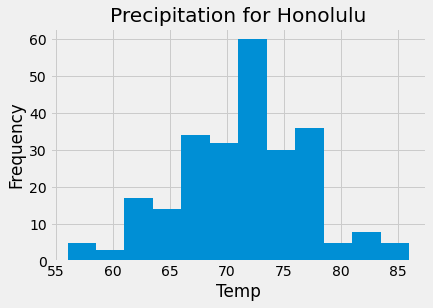

In [113]:

ax = plt.hist(df_meas, bins = 12)
plt.title('Precipitation for Honolulu')
plt.ylabel('Frequency')
plt.xlabel('Temp')
plt.show()

# Close session

In [114]:
# Close Session
session.close()